Title: 6.2 Exercises

Author: Chad Wood

Date: 1 Feb 2022

Modified By: Chad Wood

Description: This program demonstrates the use of python to perform mathematical calculations on arrays.

### Data Scaling and Working with Dataframes

When training models on data, often times it is useful to scale input features, so they all have a similar
range of values. There are multiple ways to apply this scaling, and you will build functions to perform some
of these. You will then apply this on some data.

<b>1. Data Normalization</b>

A common method to scale a data set feature is to normalize it. This puts all of the features values on a scale between 0 and 1. Given a set of values X<sub>1</sub>, X<sub>2</sub>, . . . , X<sub>n</sub>, each corresponding normalized value is calculated using the following formula.

<div>
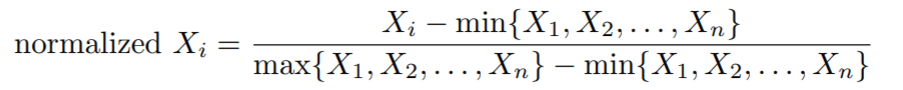
</div>

Build a Python function that takes in a vector (array) and normalizes it.

In [8]:
import numpy as np

# Works with arrays that support arithmetic operations
def normalize(array):
    # Performs calculation given in instruction
    return (array - array.max()) / (array.max() - array.min())

<b>2. Data Standardization</b>

Another common method to scale a data set feature is to standardize it. This calculates the z-score of a feature value. Given a set of values X<sub>1</sub>, X<sub>2</sub>, . . . , X<sub>n</sub>, with sample mean X̅ and sample standard deviation <sup>s</sup>X, then each corresponding standardized value is calculated using the following formula.

<div>
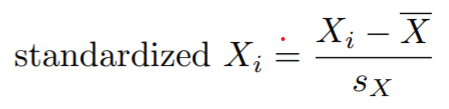
</div>

Build a Python function that takes in a vector (array) and standardizes it.

In [14]:
def standardize(array):
    # Peroforms calculation. degrees of freedom set to 1 for samp std
    return (array - array.mean()) / array.std(ddof=1) # Default ddof=0 returns pop std

<b>3. Working with a Dataframe</b>

In this problem, you will be working with the data set calif housing data.csv. This data is a modified version of the data set from https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv. This data set has housing information on various California block neighborhoods. There are five columns in the data, which include the median age (in years) of houses on the block, the total number of bedrooms on the block, the total number of households on the block, the median income on the block, and the median house value on the block. Now, suppose you are building a model to predict the median house value. Use Python code to answer the following questions

    (a) How many rows does this data set have?
    (b) What is the target vector for your model?
    (c) Create a new feature by taking the total bedrooms divided by the number of households. What does this new feature represent?
    (d) Now, create a new data frame that has three features: the median age, median income, and the new feature created in part (c) 
    (e) Take the data frame created in part (d) and apply data standardization to the features.

In [58]:
# ALL ANSWERS ARE PRINTED BELOW CELL

import pandas as pd

data = pd.read_csv('data/calif_housing_data.csv')

# (a) Retirieves rows by taking iter 0 from df.shape (row, col)
print('(a) How many rows does this data set have?')
print(f'Dataset has {data.shape[0]} rows.')
print('-'*50)

# (b) Returns the first 5 instances in median_house_value
print('(b) What is the target vector for your model?')
print(f'The target vector is the dependant variable: \n{data.median_house_value.head()}')
print('This is opposed to the explanatory variables')
print('-'*50)

# (c) Creates new column in dataset for average bedrooms per house per block
data['mean_bedrooms'] = data.total_bedrooms / data.households

print('(c) Create a new feature by taking the total bedrooms divided by the number of households',
      'What does this new feature represent?')
print(f'The mean number of bedrooms per household per block is: \n{data.mean_bedrooms.head()}')
print('-'*50)

# (d) Selects requested columns for new df
new_df = data[['housing_median_age', 'median_income', 'mean_bedrooms']]

print('(d) Now, create a new data frame that has three features:\n',
      'the median age, median income, and the new feature created in part (c)')
print(new_df.head())
print('-'*50)

# (e) Uses previouslt built function to perform standardization calculation
print('(e) Take the data frame created in part (d) and apply data standardization to the features.')

new_df_std = pd.DataFrame()
for col in new_df.columns:
    new_df_std[col] = standardize(new_df[col])

print(new_df_std.head())

(a) How many rows does this data set have?
Dataset has 20640 rows.
--------------------------------------------------
(b) What is the target vector for your model?
The target vector is the dependant variable: 
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64
This is opposed to the explanatory variables
--------------------------------------------------
(c) Create a new feature by taking the total bedrooms divided by the number of households What does this new feature represent?
The mean number of bedrooms per household per block is: 
0    1.023810
1    0.971880
2    1.073446
3    1.073059
4    1.081081
Name: mean_bedrooms, dtype: float64
--------------------------------------------------
(d) Now, create a new data frame that has three features:
 the median age, median income, and the new feature created in part (c)
   housing_median_age  median_income  mean_bedrooms
0                  41         8.3252       1.023810
1      